In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Abdur Rehman And Arooj Safdar
path ="/content/drive/MyDrive/Colab Notebooks/Overall_Feedback_Report.csv"
df = pd.read_csv(path ,encoding ='unicode_escape')

In [ ]:
df.shape

(9261, 41)

In [ ]:
print(df.columns.tolist())

['S No.', 'E.C No', 'Date', 'Caller Name', 'Cell Number', 'Call Time', 'Time Out', 'Time In', 'Emergency Place', 'Res Time', 'Natuer of Emergency ', 'Shifted to', 'Station', 'Vehicle ', 'KM Out', 'KM In', 'Total KM', 'Staff ', 'Reason', 'Colision between', 'Victim Name', 'No of Victims', 'Age', 'Action Taken', 'Expired', 'Address', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40']


In [ ]:
# Remove rows where Date is missing
df = df[df['Date'].notnull()]

In [ ]:
df.shape

(8936, 41)

In [ ]:
df.columns = [
    'Serial_No', 'Emergency_Call_No', 'Date', 'Caller_Name', 'Cell_Number',
    'Call_Time', 'Time_Out', 'Time_In', 'Emergency_Place', 'Response_Time',
    'Emergency_Type', 'Shifted_To', 'Station', 'Vehicle', 'KM_Out', 'KM_In',
    'Total_KM', 'Staff', 'Reason', 'Collision_Between', 'Victim_Name',
    'No_of_Victims', 'Age', 'Action_Taken', 'Expired', 'Address',
    'Unnamed_26', 'Unnamed_27', 'Unnamed_28', 'Unnamed_29', 'Unnamed_30',
    'Unnamed_31', 'Unnamed_32', 'Unnamed_33', 'Unnamed_34', 'Unnamed_35',
    'Unnamed_36', 'Unnamed_37', 'Unnamed_38', 'Unnamed_39', 'Unnamed_40'
]

In [ ]:
print(df.columns.tolist())

['Serial_No', 'Emergency_Call_No', 'Date', 'Caller_Name', 'Cell_Number', 'Call_Time', 'Time_Out', 'Time_In', 'Emergency_Place', 'Response_Time', 'Emergency_Type', 'Shifted_To', 'Station', 'Vehicle', 'KM_Out', 'KM_In', 'Total_KM', 'Staff', 'Reason', 'Collision_Between', 'Victim_Name', 'No_of_Victims', 'Age', 'Action_Taken', 'Expired', 'Address', 'Unnamed_26', 'Unnamed_27', 'Unnamed_28', 'Unnamed_29', 'Unnamed_30', 'Unnamed_31', 'Unnamed_32', 'Unnamed_33', 'Unnamed_34', 'Unnamed_35', 'Unnamed_36', 'Unnamed_37', 'Unnamed_38', 'Unnamed_39', 'Unnamed_40']


In [ ]:
# Drop columns that start with "Unnamed"
df = df.loc[:, ~df.columns.str.startswith('Unnamed')]

In [ ]:
print(df.columns.tolist())

['Serial_No', 'Emergency_Call_No', 'Date', 'Caller_Name', 'Cell_Number', 'Call_Time', 'Time_Out', 'Time_In', 'Emergency_Place', 'Response_Time', 'Emergency_Type', 'Shifted_To', 'Station', 'Vehicle', 'KM_Out', 'KM_In', 'Total_KM', 'Staff', 'Reason', 'Collision_Between', 'Victim_Name', 'No_of_Victims', 'Age', 'Action_Taken', 'Expired', 'Address']


In [ ]:
# Convert time strings to datetime objects, handling inconsistent formats
for col in ['Call_Time', 'Time_Out', 'Time_In']:
    df[col] = pd.to_datetime(df[col], format='%I:%M %p', errors='coerce')

# Confirm the conversion
print(df[['Call_Time', 'Time_Out', 'Time_In']].head())

            Call_Time            Time_Out             Time_In
0 1900-01-01 07:13:00 1900-01-01 07:15:00 1900-01-01 08:20:00
1 1900-01-01 08:22:00 1900-01-01 08:25:00 1900-01-01 09:10:00
2 1900-01-01 08:30:00 1900-01-01 08:32:00 1900-01-01 09:00:00
3 1900-01-01 08:53:00 1900-01-01 08:55:00 1900-01-01 09:20:00
4 1900-01-01 09:47:00 1900-01-01 09:50:00 1900-01-01 11:00:00


In [ ]:
df['Response_Duration'] = (df['Time_In'] - df['Call_Time']).dt.total_seconds() / 60


In [ ]:
import numpy as np

def clean_age(age):
    if pd.isna(age):
        return np.nan
    age = str(age)
    parts = [int(s) for s in age.replace(',', '+').split('+') if s.isdigit()]
    return round(np.mean(parts), 2) if parts else np.nan

df['Age_Cleaned'] = df['Age'].apply(clean_age)

In [ ]:
df_model = df[['Response_Duration', 'Age_Cleaned', 'Expired']].dropna()


In [ ]:
print(df_model.head())
print(df_model.dtypes)
print("Rows for ML:", df_model.shape[0])

     Response_Duration  Age_Cleaned Expired
40                72.0         96.0       1
54                20.0         59.0       1
155              300.0         69.0       1
160               65.0         70.0       1
553               19.0          8.0       1
Response_Duration    float64
Age_Cleaned          float64
Expired               object
dtype: object
Rows for ML: 4383


In [ ]:
print(df_model['Expired'].unique())


['1' '`' '---' '----' '-' '2' '3' '0']


In [ ]:
# Define a mapping for known values
expired_map = {
    '1': 1,
    '0': 0,
    '2': 2,    # Optional: set to 1 or 2 if you want to reflect actual count
    '3': 3,    # Optional: same here
    '`': 0,
    '---': 0,
    '----': 0,
    '-': 0
}

# Apply the mapping
df_model['Expired'] = df_model['Expired'].map(expired_map).fillna(0).astype(int)

# Verify
print(df_model['Expired'].unique())


[1 0 2 3]


In [ ]:
print(df['Expired'].unique())
print(df['Expired'].value_counts())


[nan '1' '---' '`' ' ---' '----' '-' '2' '3' '10' '0']
Expired
---     3579
----     951
0        434
1        102
-         25
2          4
`          1
 ---       1
3          1
10         1
Name: count, dtype: int64


In [ ]:
# Step 1: Keep only rows with valid numeric values in 'Expired'
df_cleaned = df[df['Expired'].isin(['0', '1', '2', '3'])].copy()

# Step 2: Convert 'Expired' to integer type
df_cleaned['Expired'] = df_cleaned['Expired'].astype(int)

# Step 3: Check results
print(df_cleaned['Expired'].value_counts())
print(df_cleaned['Expired'].dtype)


Expired
0    434
1    102
2      4
3      1
Name: count, dtype: int64
int64


In [ ]:
df_cleaned['Expired_Binary'] = df_cleaned['Expired'].apply(lambda x: 1 if x > 0 else 0)


In [ ]:
print(df_model['Expired'].unique())

[1 0 2 3]


In [ ]:
# Convert to binary classification target
df_model['Expired_Binary'] = df_model['Expired'].apply(lambda x: 1 if x > 0 else 0)

# Check result
print(df_model['Expired_Binary'].unique())
print(df_model['Expired_Binary'].value_counts())


[1 0]
Expired_Binary
0    4299
1      84
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define features and target
features = ['Response_Duration', 'Age_Cleaned']
target = 'Expired_Binary'

X = df_model[features]
y = df_model[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Accuracy: 0.9771949828962372

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       858
           1       0.00      0.00      0.00        19

    accuracy                           0.98       877
   macro avg       0.49      0.50      0.49       877
weighted avg       0.96      0.98      0.97       877


📉 Confusion Matrix:
 [[857   1]
 [ 19   0]]


In [ ]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Train on balanced data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Accuracy: 0.9255813953488372

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93       870
           1       0.94      0.91      0.92       850

    accuracy                           0.93      1720
   macro avg       0.93      0.93      0.93      1720
weighted avg       0.93      0.93      0.93      1720


📉 Confusion Matrix:
 [[822  48]
 [ 80 770]]


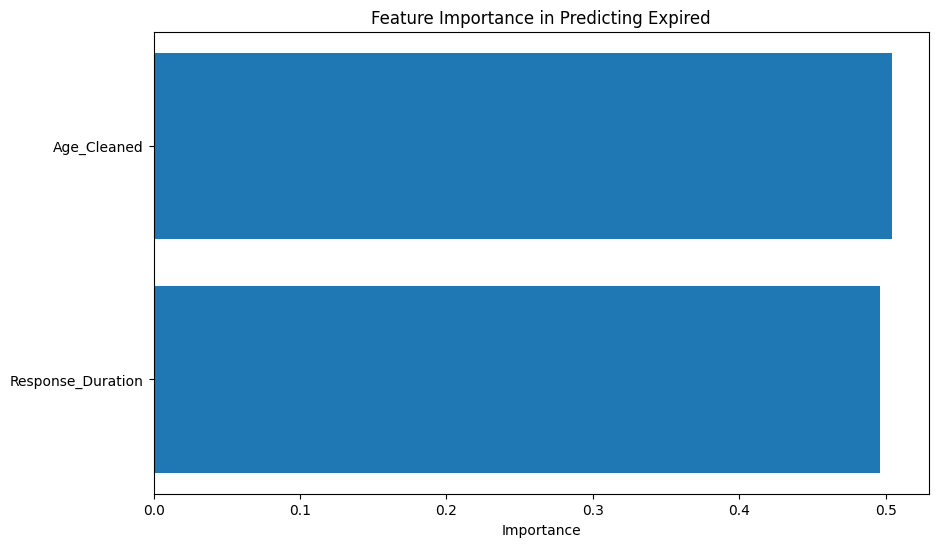

In [ ]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Feature Importance in Predicting Expired")
plt.show()

In [ ]:
from xgboost import XGBClassifier

best_params = {
    'learning_rate': 0.2,
    'max_depth': 7,
    'n_estimators': 200,
    'scale_pos_weight': 30
}

xgb = XGBClassifier(**best_params)

# Fit the model
xgb.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8645348837209302

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.76      0.85       870
           1       0.80      0.97      0.88       850

    accuracy                           0.86      1720
   macro avg       0.88      0.87      0.86      1720
weighted avg       0.88      0.86      0.86      1720


Confusion Matrix:
 [[664 206]
 [ 27 823]]


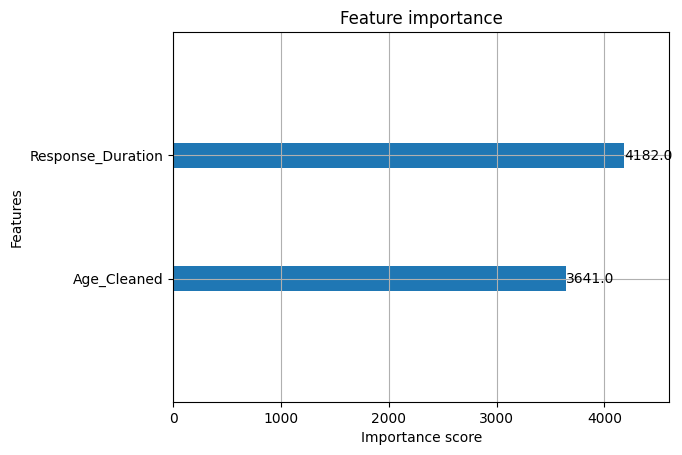

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(xgb)
plt.show()


In [ ]:
import joblib
joblib.dump(xgb, 'expired_prediction_model. abdur Rehman')

['expired_prediction_model. abdur Rehman']

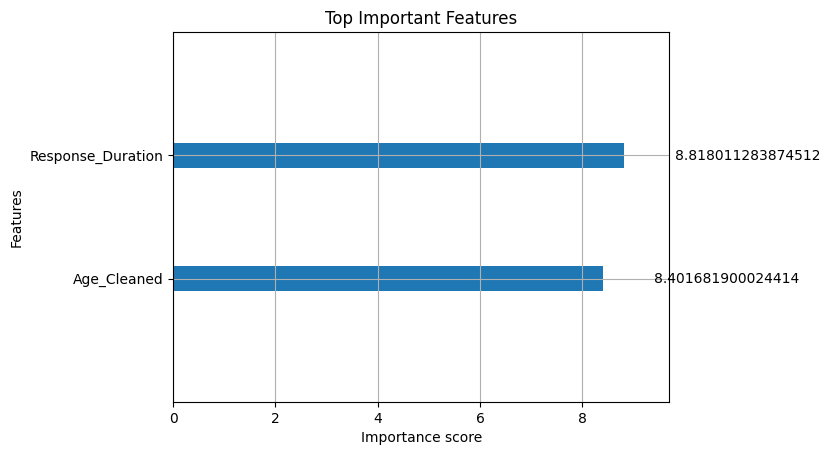

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(xgb, importance_type='gain', max_num_features=10)  # top 10 features
plt.title("Top Important Features")
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score

y_proba = xgb.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", auc)


ROC AUC Score: 0.9664063556457065


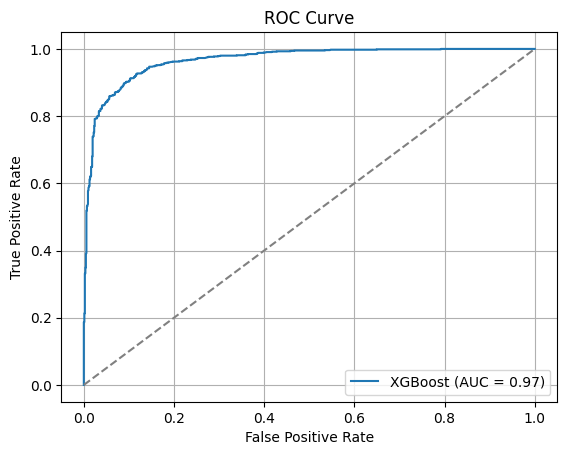

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label='XGBoost (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import pandas as pd

X_test_df = X_test.copy()
X_test_df['True_Label'] = y_test
X_test_df['Predicted'] = y_pred

# False Negatives: Actual = 1, Predicted = 0 (missed deaths)
false_negatives = X_test_df[(X_test_df['True_Label'] == 1) & (X_test_df['Predicted'] == 0)]

# False Positives: Actual = 0, Predicted = 1 (wrongly flagged as death)
false_positives = X_test_df[(X_test_df['True_Label'] == 0) & (X_test_df['Predicted'] == 1)]

print("False Negatives:\n", false_negatives)
print("False Positives:\n", false_positives)


False Negatives:
       Response_Duration  Age_Cleaned  True_Label  Predicted
5333          17.764524    65.044648           1          0
6533          54.108862    62.227846           1          0
7988          47.718577    20.018936           1          0
8             27.000000    68.000000           1          0
7152          40.195404    80.656453           1          0
6165          35.144972    20.429981           1          0
4028          57.000000    55.000000           1          0
6940          41.019038    44.254759           1          0
866           42.000000    25.000000           1          0
6260          71.809013    70.000000           1          0
4503          73.917537    70.000000           1          0
4537         330.594995    30.593517           1          0
7956          35.014366    75.608620           1          0
1226          90.000000    25.000000           1          0
7005          27.241188    48.102971           1          0
5277          68.16723

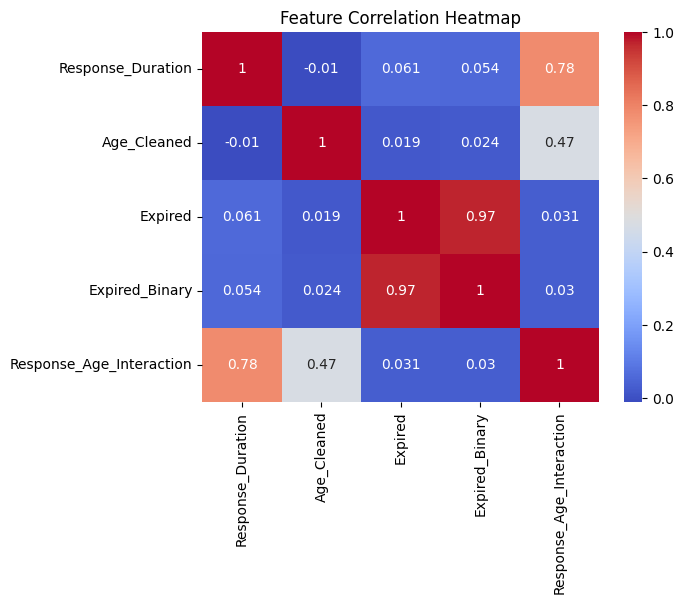

In [ ]:
import seaborn as sns

sns.heatmap(df_model.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()